# LAB1: Clustering Task
### Vårt företag säljer allt ifrån kött, till fisk, till smycken och har både fysiska affärer och en online-shop. Vi har fått i uppdrag av vårt företag att segmentera våra kunder för att bättre nå ut med träffsäkra erbjudanden till vår kunder. Vi ska därför använda clustringstekniker.

## Data Explanation
### General
- ID: Kundens unika ID
- Year_Birth: Kundens födelseår
- Education: Kundens utbildningsnivå
- Marital_Status: Kundens civilstånd
- Income: Kundens hushålls årliga inkomst
- Kidhome: Antal barn i kundens hushåll
- Teenhome: Antal tonåringar i kundens hushåll
- Dt_Customer: Datum för kundens inskrivning i vårt företags kundsystem
- Recency: Antal dagar sedan kundens senaste köp
- Complain: 1, om kunden har klagat inom de senaste 2 åren, annars 0

### Products
- MntWines: Summa spenderat på vin de senaste 2 åren.
- MntFruits: Summa spenderat på frukt de senaste 2 åren.
- MntMeatProducts: Summa spenderat på kött de senaste 2 åren.
- MntFishProducts: Summa spenderat på fisk de senaste 2 åren.
- MntSweetProducts: Summa spenderat på godis de senaste 2 åren.
- MntGoldProds: Summa spenderat på guld de senaste 2 åren.

### Promotion
- NumDealsPurchases: Antal genomförda köp som kunden gjort med en rabattkod.
- AcceptedCmp1: 1, om kunden accepterade erbjudande i vår första kampanj, annars 0.
- AcceptedCmp2: 1, om kunden accepterade erbjudande i vår andra kampanj, annars 0.
- AcceptedCmp3: 1, om kunden accepterade erbjudande i vår tredje kampanj, annars 0.
- AcceptedCmp4: 1, om kunden accepterade erbjudande i vår fjärde kampanj, annars 0.
- AcceptedCmp5: 1, om kunden accepterade erbjudande i vår femte kampanj, annars 0.
- Response: 1, om kunden accepterade erbjudande i vår senaste kampanj, annars 0.

### Place
- NumWebPurchases: Antal köp kunden genomfört genom företagets hemsida.
- NumCatalogPurchases: Antal köp kunden genomfört genom företagets katalog.
- NumStorePurchases: Antal köp kunden genomfört hos företagets affär.
- NumWebVisitsMonth: Antal besök kunden genomfört på företagets hemsida den senaste månaden.


## What to do?
### 1. Data cleaning:
- .csv-filen är väldigt ostrukturerad. Kolumnerna behöver definieras.
- Varje kolumns dtype behöver definieras:
    - Många av kolumnerna bör vara int
    - Några av kolumnerna bör vara koverteras från kategoriska till int.
    - Vi har en datum-kolumn. Behöver vi denna?
- Vilka kolumner kan vi ta bort?

### 2. Normalisation:
- Normalisera vår data med lämplig metod.

### 3. Dimensionsreduktion
- Använd PCA för att begränsa antalet kolumner i vårt dataset.

### 4. Clustering
- Använd en lämplig clustering-metod för att segmentera vårt dataset i grupper.

### 5. Visualisera cluster
- Använd matplotlib.pyplot för att visualiser våra cluster.

### 6. Performance measure
- from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
- Använd Silhouette Score, Calinski Harabasz Score och Davies Bouldin Score för att sätta ett värde på hur bra clustering vi genomfört.
- Baserat på dessa värden, optimera din clustering.

In [82]:
import pandas as pd
df = pd.read_csv('Clustering_CustomerSegmentation.csv',delimiter='\t')

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [84]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

In [85]:
df.dropna(subset=['Income'], inplace=True)

In [86]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [87]:
dum_col = ['Education', 'Dt_Customer']
good_col = []

for i in df.columns:
    if i not in dum_col:
        good_col.append(i)

In [88]:
df['Marital_Status'].replace({'Single': 0 , 'Together': 1, 'Married': 2, 'Divorced': 3, 'Widow': 4,'Alone': 5,'Absurd': 6,'YOLO': 7}, inplace=True)

In [89]:
new_df = df[good_col]
new_df['Marital_Status'].astype(int)

0       0
1       0
2       1
3       1
4       2
       ..
2235    2
2236    1
2237    3
2238    1
2239    2
Name: Marital_Status, Length: 2216, dtype: int32

In [90]:
new_df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,2,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,1,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,3,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,1,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [91]:
new_df.dtypes

ID                       int64
Year_Birth               int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [92]:
targe_col = ['Response']
features_col = [col for col in good_col if col not in targe_col]

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler_s = StandardScaler()
# scaler_m = MinMaxScaler()

In [94]:
n_s = scaler_s.fit(new_df[features_col])
#n_m = scaler_m.fit(new_df[features_col])

In [95]:
new_df[features_col] = pd.DataFrame(scaler_s.transform(new_df[features_col]), index=df.index, columns=features_col)
#new_df[features_col] = pd.DataFrame(scaler_m.transform(new_df[features_col]), index=df.index, columns=features_col)

C:\Users\sina3\AppData\Local\Temp\ipykernel_12628\1937099721.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[features_col] = pd.DataFrame(scaler_s.transform(new_df[features_col]), index=df.index, columns=features_col)


In [96]:
new_df[features_col]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.019809,-0.986443,-1.399454,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
1,-1.051009,-1.236801,-1.399454,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
2,-0.445526,-0.318822,-0.467606,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
3,0.182737,1.266777,-0.467606,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
4,-0.081373,1.016420,0.464242,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625801,-0.151917,0.464242,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
2236,-0.488620,-1.904422,-0.467606,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0
2237,0.517646,1.016420,1.396090,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
2238,0.814693,-1.069896,-0.467606,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0


In [151]:
from sklearn.cluster import KMeans


In [148]:
X = df[features_col]

In [155]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

c:\Users\sina3\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [156]:
new_df['cluster'] = kmeans.labels_

C:\Users\sina3\AppData\Local\Temp\ipykernel_12628\757520140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['cluster'] = kmeans.labels_


In [157]:
new_df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,cluster
0,-0.019809,-0.986443,-1.399454,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,1,1
1,-1.051009,-1.236801,-1.399454,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,0
2,-0.445526,-0.318822,-0.467606,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,1
3,0.182737,1.266777,-0.467606,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,0
4,-0.081373,1.016420,0.464242,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625801,-0.151917,0.464242,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,1
2236,-0.488620,-1.904422,-0.467606,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0,0,1
2237,0.517646,1.016420,1.396090,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,1
2238,0.814693,-1.069896,-0.467606,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0,0,1


In [105]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [98]:
new_df[features_col]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue
0,-0.019809,-0.986443,-1.399454,0.234063,-0.823039,-0.928972,0.310532,0.978226,1.549429,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
1,-1.051009,-1.236801,-1.399454,-0.234559,1.039938,0.909066,-0.380509,-0.872024,-0.637328,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
2,-0.445526,-0.318822,-0.467606,0.769478,-0.823039,-0.928972,-0.795134,0.358511,0.569159,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
3,0.182737,1.266777,-0.467606,-1.017239,1.039938,-0.928972,-0.795134,-0.872024,-0.561922,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
4,-0.081373,1.016420,0.464242,0.240221,1.039938,-0.928972,1.554407,-0.391671,0.418348,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1.625801,-0.151917,0.464242,0.356642,-0.823039,0.909066,-0.104093,1.197646,0.418348,0.066913,0.079693,2.215416,3.919308,-0.168231,1.793473,0.112428,-0.554143,-0.131574,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
2236,-0.488620,-1.904422,-0.467606,0.467539,2.902916,0.909066,0.241428,0.299208,-0.662463,-0.610954,-0.687574,-0.658233,-0.694260,2.431492,1.428553,-0.229327,-0.246455,0.693232,-0.281773,-0.282705,-0.280839,3.821732,-0.117148,-0.097812,0.0,0.0
2237,0.517646,1.016420,1.396090,0.188091,-0.823039,-0.928972,1.450751,1.787710,0.544024,0.223001,-0.102990,-0.365998,-0.385402,-0.688176,-0.760962,0.112428,2.215044,0.280829,-0.281773,3.537258,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0
2238,0.814693,-1.069896,-0.467606,0.675388,-0.823039,0.909066,-1.417072,0.364441,0.091591,0.209622,0.773887,0.072356,0.328832,-0.168231,0.698715,0.795937,1.291982,-0.956381,-0.281773,-0.282705,-0.280839,-0.261661,-0.117148,-0.097812,0.0,0.0


In [99]:
pca = PCA(n_components=2)

In [100]:
pca.fit(new_df)

PCA(n_components=2)

In [101]:
df_pca = pca.fit_transform(new_df)

In [111]:
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

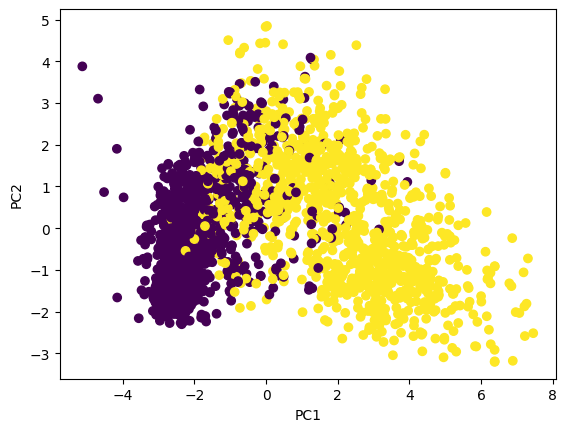

In [158]:
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=new_df['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()